**1. Понимание бизнеса**

**1.1 Цель**

Построить модель, классифицирующую качество Португальского вина (от 0 до 10) на основании входных параметров.

**1.2 Описание**

В качестве датасета выбраны данные Wine quality data set. Датасет содержит информацию о белом и красном вине в части их физико-химических свойств.
Будет произведен анализ и предсказана оценка на основе качества вина и его характеристик.
Датасет взят с с сайта kaggle. Ссылка: https://www.kaggle.com/datasets/rajyellow46/wine-quality/

**2. Data Understanding**

**2.1 Import Librares**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', 100)
from sklearn. model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
%matplotlib inline

**2.2 Загрузка данных**

In [ ]:
df = pd.read_csv('winequalityN.csv')

**2.3 Статистика и визуализация**

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Описание переменных

1 - fixed acidity - фиксированная кислотность

2 - volatile acidity - переменная кислотность

3 - citric acid - лимонная кислота

4 - residual sugar - остаточный сахар

5 - chlorides - хлориды

6 - free sulfur dioxide - свободный диоксид серы

7 - total sulfur dioxide - общий диоксид серы

8 - density - плотность

9 - pH - водородный показатель

10 - sulphates - сульфаты

11 - alcohol - спирт

12 - quality (score between 0 and 10) - качество (оценка от 0 до 10)

**2.4 Информация о переменных**

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


По данным видно, что минимальная оценка 3, а максимальная 9. Из этого можно сделать вывод, что отсутсвуют оценки 0, 1, 2 и 10. Также можно наблюдать, что 7 признаков не имеют полных данных

**Баланс классов**

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
middle = [5,6,7]
print('Вина со средней оценкой (5-7): ', 100*round(df['quality'][df['quality'].isin(middle)].count()/df['quality'].count(),4), '%')

Вина со средней оценкой (5-7):  93.17 %


<Axes: xlabel='quality', ylabel='count'>

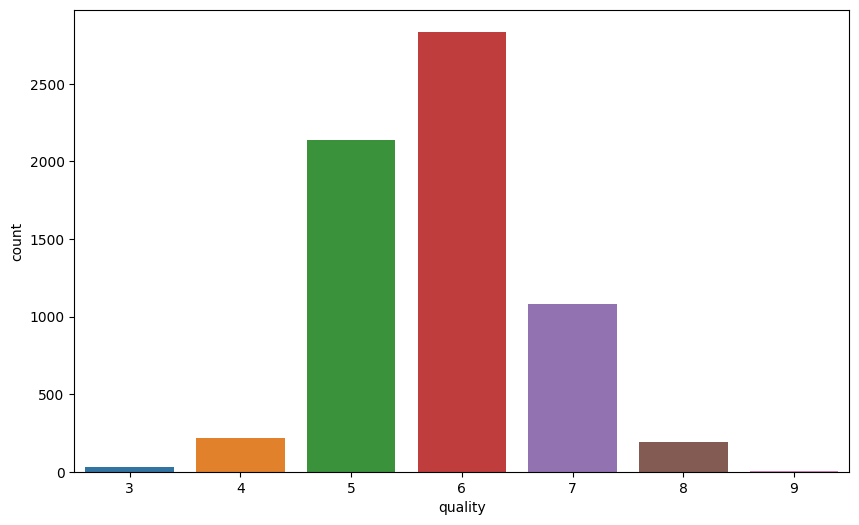

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x='quality', data=df)

Оценки вин не равномерны, больше всего вин с оценкой 5,6 и 7. Суммарное количество вин с оценками 5-7 состаляет 93% от всего количества

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Тепловая карта корреляции**

<ipython-input-15-5b26287b113f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')


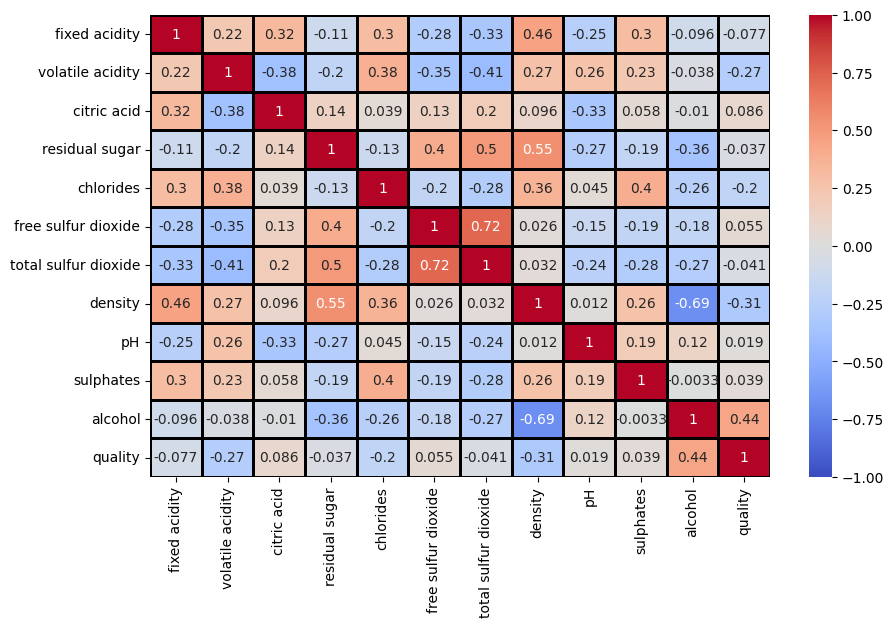

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')

На оценку качества больше всгео влияет параметр сожержания алкоголя, а также переменная кислотность, плотность и хлориды. Остальные переменные имеют меньшее влияние.

<Axes: xlabel='quality', ylabel='alcohol'>

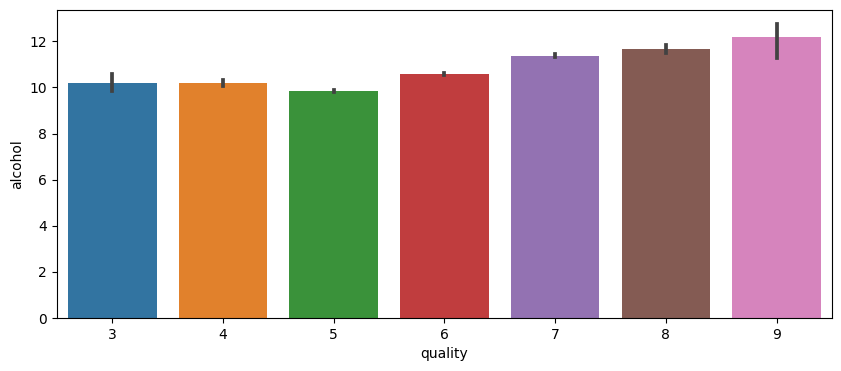

In [ ]:
fig = plt.figure(figsize = (10,4))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

Можно отметить, что есть незначительная зависимость от процента алкоголя, чем он выше, тем выше оценка.

**3. Data Preparation**

**3.1 Категориальные переменные должны быть преобразованы в числовые переменные**

In [ ]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [ ]:
df = df.replace(['white', 'red'],['0', '1'])
# замена типа вина на числа: белое вино - 0; красное вино - 1

In [ ]:
df['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

**3.2 Заполнение пропущенные значения в переменных**

In [ ]:
df.isnull().sum()
# проверка количества и места пропусков

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace = True)
# так как пропусков не много, то можно заменить их средним значением

**3.3 Определение данных для обучения и теста.**

In [ ]:
X = df.iloc [:, 0:12]

In [ ]:
y = df['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2 , random_state= 0 )

**4. Моделирование**

**4.1 Выбор модели**

In [ ]:
model = RandomForestClassifier(random_state= 0)
# модель RandomForrest("случайный лес")

**4.2 Обучение модели**

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**5. Оценка**

In [ ]:
model.score(X_test, y_test)

0.6884615384615385

Результат обучения модели не самый лучший, постараемся его исправить. Такой результат вызван скорее всего дисбалансом классов, необходимо увеличить число примеров, для этого используем алгоритм SMOTE

In [ ]:
st = SMOTE(random_state=42, k_neighbors=4)

In [ ]:
X_val, y_val = st.fit_resample(X, y)

In [ ]:
modelN = RandomForestClassifier(random_state= 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size= 0.2 , random_state= 0 )

In [ ]:
modelN.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
modelN.score(X_test, y_test)

0.8957441450516243

Результат стал лучше

**6. Развертывание**

ДЛя оценки качества вина лучше подойдет вторая модель(modelN)